# Assignment: Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

### Введение

Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.
### Материалы

    Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
    Matplotlib User Guide: http://matplotlib.org/users/index.html

### Инструкция по выполнению

Данное задание состоит из трех частей. В каждой ответом будет набор чисел

## Задача 1. Минимизация гладкой функции

1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
4. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
5. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1.
6. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1.
7. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции, можно увидеть, в какие именно минимумы мы попали.

In [31]:
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

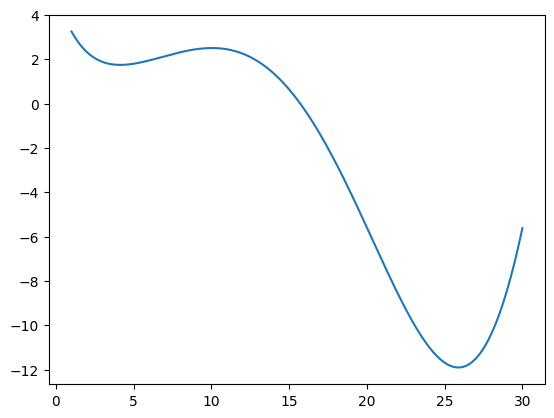

In [121]:
def f(x):
    return np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)

x_linspace = np.linspace(1, 30, 1000)
plt.plot(x_linspace, f(x_linspace))

In [62]:
print('Попадаем в первую яму:')
print(optimize.minimize(f, 2))
print()
print('Попадаем во вторую яму:')
print(optimize.minimize(f, 20))

Попадаем в первую яму:
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.7452682903449388
        x: [ 4.136e+00]
      nit: 6
      jac: [-2.071e-06]
 hess_inv: [[ 5.988e+00]]
     nfev: 14
     njev: 7

Попадаем во вторую яму:
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -11.898894665971952
        x: [ 2.588e+01]
      nit: 4
      jac: [-3.338e-06]
 hess_inv: [[ 1.685e+00]]
     nfev: 14
     njev: 7


In [63]:
answer_1 = optimize.minimize(f, 2, method='BFGS').fun
answer_1


1.7452682903449388

## Задача 2: Глобальная оптимизация

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации - дифференциальную эволюцию.
2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
5. Дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [119]:
optimize.differential_evolution(f, [(1, 30)])

             message: Optimization terminated successfully.
             success: True
                 fun: -11.898894665981322
                   x: [ 2.588e+01]
                 nit: 5
                nfev: 98
          population: [[ 2.582e+01]
                       [ 2.612e+01]
                       ...
                       [ 2.567e+01]
                       [ 2.607e+01]]
 population_energies: [-1.190e+01 -1.188e+01 ... -1.189e+01 -1.189e+01]
                 jac: [ 1.776e-07]

In [107]:
answer_2 = round(optimize.differential_evolution(f, [(1, 30)]).fun, 2)
answer_2

-11.9

## Задача 3. Минимизация негладкой функции

1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Постройте график h(x) с помощью matplotlib.
3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании.
5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

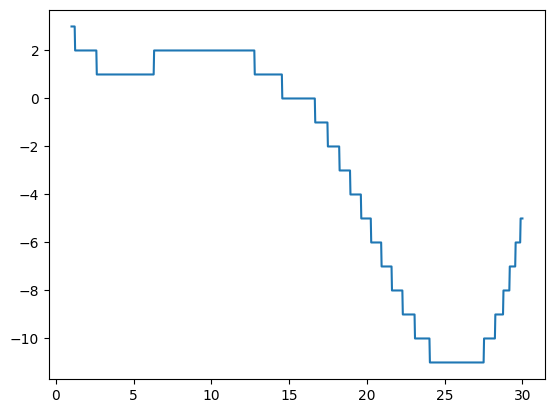

In [126]:
def h(x):
    return np.int_(f(x))

plt.plot(x_linspace, h(x_linspace))

In [131]:
optimize.minimize(h, 30, method='BFGS')

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -5
        x: [ 3.000e+01]
      nit: 0
      jac: [ 0.000e+00]
 hess_inv: [[1]]
     nfev: 2
     njev: 1

In [132]:
optimize.differential_evolution(h, [(1, 30)])

             message: Optimization terminated successfully.
             success: True
                 fun: -11.0
                   x: [ 2.495e+01]
                 nit: 7
                nfev: 122
          population: [[ 2.495e+01]
                       [ 2.569e+01]
                       ...
                       [ 2.615e+01]
                       [ 2.625e+01]]
 population_energies: [-1.100e+01 -1.100e+01 ... -1.100e+01 -1.100e+01]